In [24]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [32]:
data = yf.download(tickers='MULN', period='1d', interval='1m')

#Interval required 1 minute
data['Middle Band'] = data['Close'].rolling(window=5).mean()
data['Upper Band'] = data['Middle Band'] + 1.96*data['Close'].rolling(window=21).std()
data['Lower Band'] = data['Middle Band'] - 1.96*data['Close'].rolling(window=21).std()

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Middle Band,Upper Band,Lower Band
Datetime,,,,,,,,,
2023-01-31 09:30:00-05:00,0.330000,0.3308,0.3300,0.3305,0.3305,6280736,NaN,NaN,NaN
2023-01-31 09:31:00-05:00,0.330400,0.3330,0.3304,0.3325,0.3325,641666,NaN,NaN,NaN
2023-01-31 09:32:00-05:00,0.331201,0.3325,0.3300,0.3317,0.3317,1049187,NaN,NaN,NaN
2023-01-31 09:33:00-05:00,0.331800,0.3375,0.3311,0.3372,0.3372,1454821,NaN,NaN,NaN
2023-01-31 09:34:00-05:00,0.337500,0.3400,0.3361,0.3400,0.3400,2192273,0.33438,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-31 15:53:00-05:00,0.339800,0.3399,0.3390,0.3399,0.3399,653631,0.33554,0.340397,0.330683
2023-01-31 15:54:00-05:00,0.339700,0.3414,0.3395,0.3410,0.3410,892972,0.33762,0.343100,0.332140
2023-01-31 15:55:00-05:00,0.341000,0.3412,0.3391,0.3409,0.3409,1227356,0.33914,0.345112,0.333168


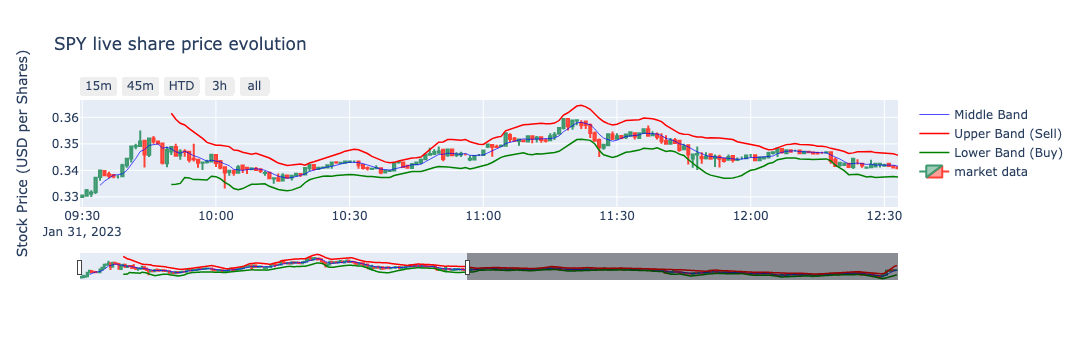

In [33]:
#declare figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y= data['Middle Band'],line=dict(color='blue', width=.7), name = 'Middle Band'))
fig.add_trace(go.Scatter(x=data.index, y= data['Upper Band'],line=dict(color='red', width=1.5), name = 'Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=data.index, y= data['Lower Band'],line=dict(color='green', width=1.5), name = 'Lower Band (Buy)'))


#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='SPY live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()